In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv("House Price Prediction Dataset.csv")

print(df.head())     
print(df.shape)       
print(df.columns)     

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  
(2000, 10)
Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')


In [ ]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [ ]:

print(df.isnull().sum())

for col in df.select_dtypes(include=np.number):
    df[col].fillna(df[col].mean(), inplace=True)

for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)


Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [ ]:


print(df.duplicated().sum())
df.drop_duplicates(inplace=True)


0


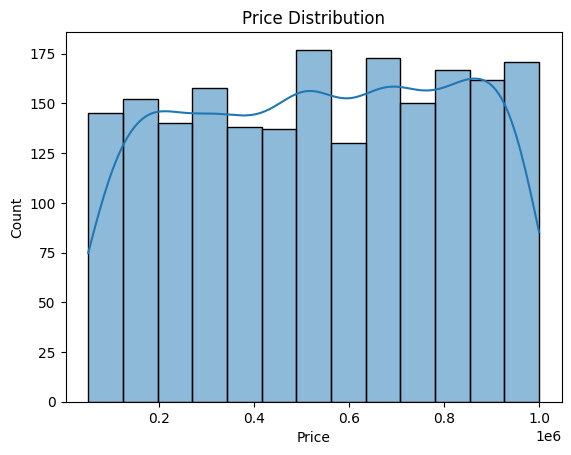

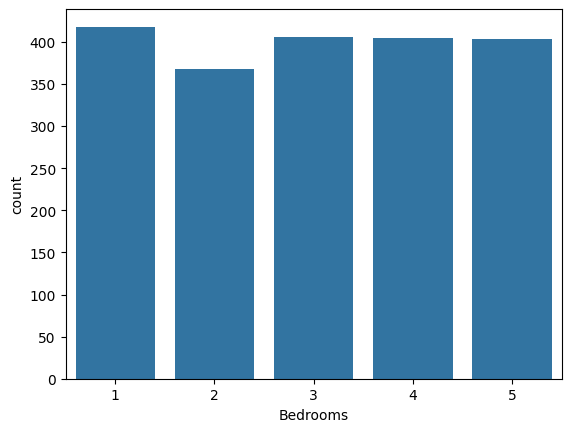

In [ ]:


sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

sns.countplot(x='Bedrooms', data=df)
plt.show()



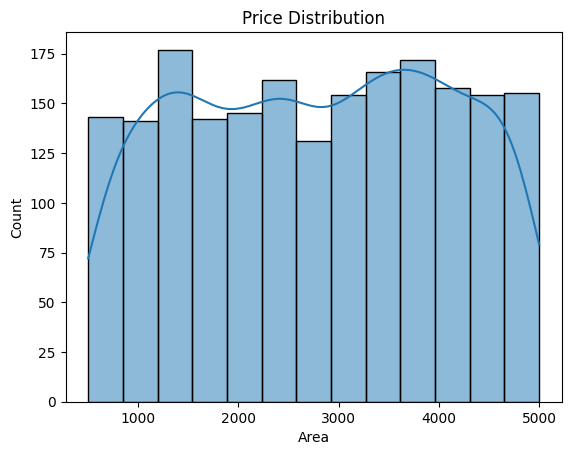

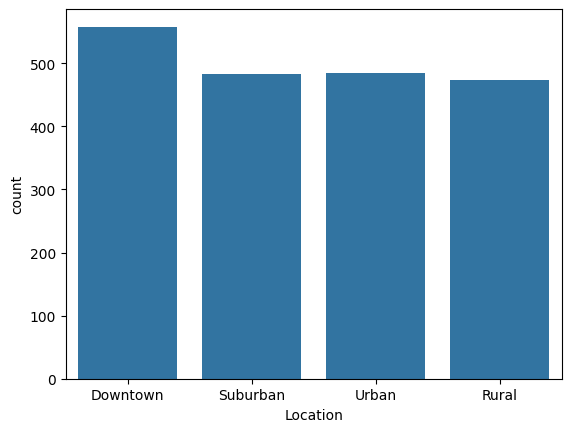

In [ ]:

sns.histplot(df['Area'], kde=True)
plt.title("Price Distribution")
plt.show()

sns.countplot(x='Location', data=df)
plt.show()



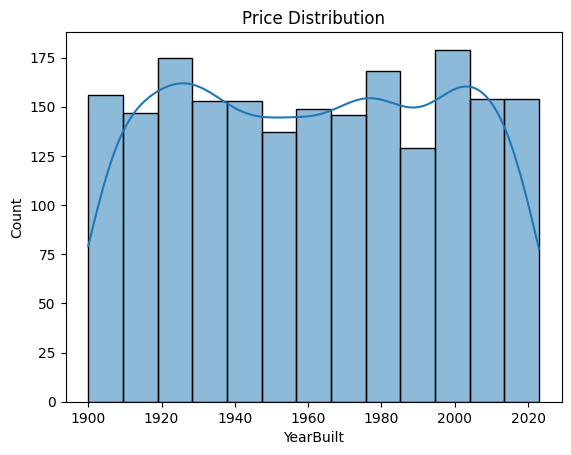

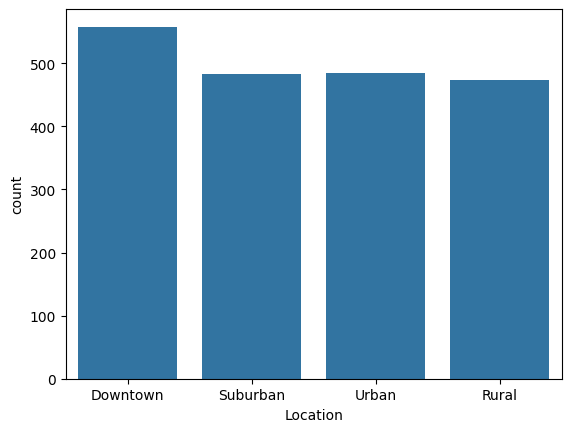

In [ ]:

sns.histplot(df['YearBuilt'], kde=True)
plt.title("Price Distribution")
plt.show()

sns.countplot(x='Location', data=df)
plt.show()




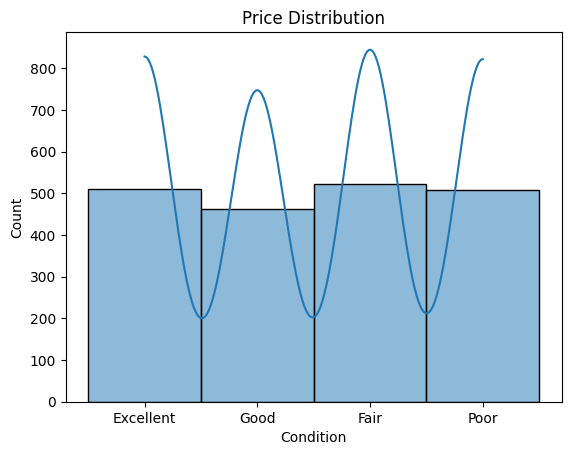

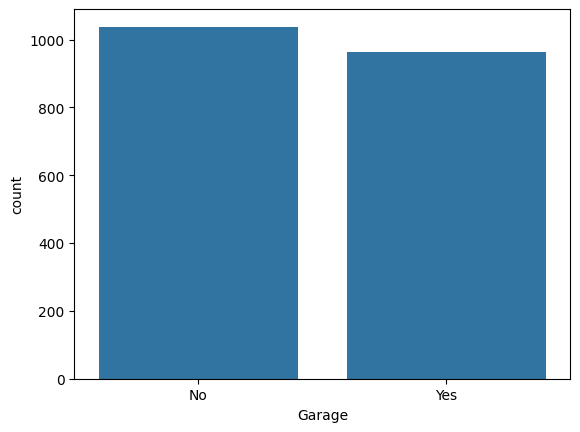

In [ ]:

sns.histplot(df['Condition'], kde=True)
plt.title("Price Distribution")
plt.show()

sns.countplot(x='Garage', data=df)
plt.show()




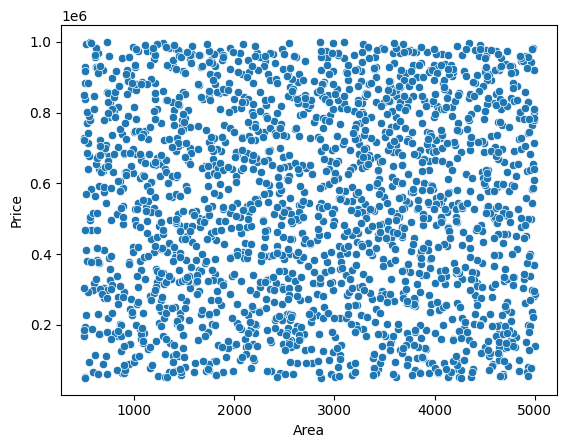

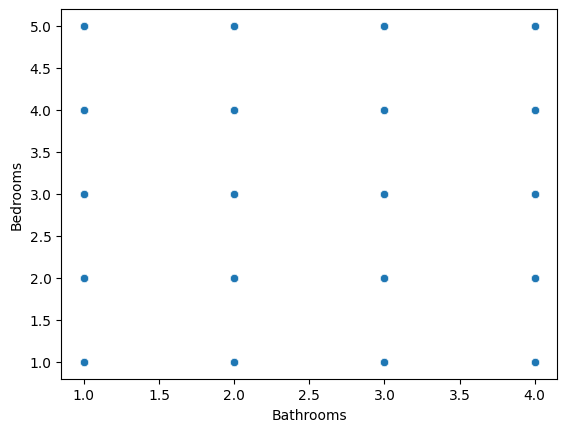

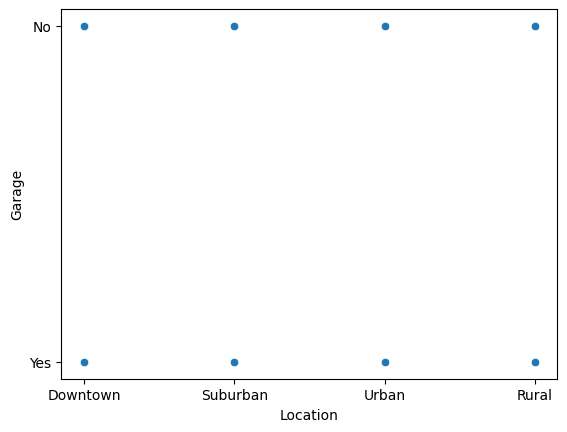

In [ ]:

sns.scatterplot(x='Area', y='Price', data=df)
plt.show()

sns.scatterplot(x='Bathrooms', y='Bedrooms', data=df)
plt.show()

sns.scatterplot(x='Location', y='Garage', data=df)
plt.show()



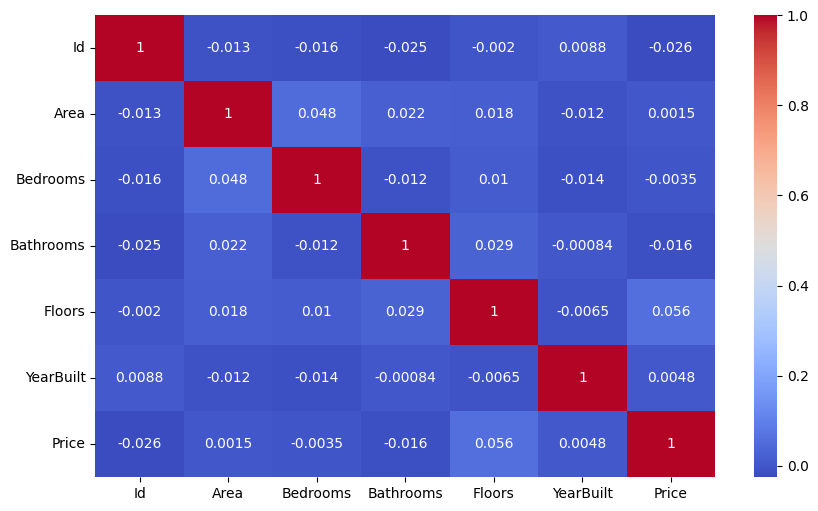

In [ ]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


In [ ]:

df = pd.get_dummies(df, drop_first=True)


In [ ]:


from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))




MAE: 242867.44926338625
R2 Score: -0.006181784611834162


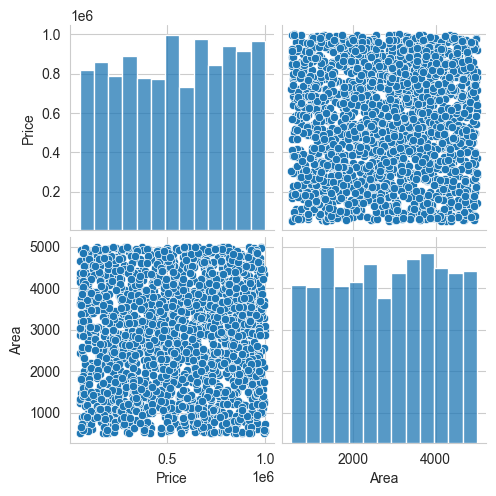

In [ ]:

sns.pairplot(df[['Price','Area']])
plt.show()
